# Covariance and Correlation

# Covarianza

*Tiene como objetivo medir cómo dos variables "se mueven" en tándem de sus medias*

**Medición de la covarianza** 
- Piense en el conjunto de datos para las dos variables como vectores de alta dimensión. 
- Conviértalos en vectores de varianzas de la media. 
- Tome el producto de punto (coseno del ángulo entre ellos) de los dos vectores. 
- Divida por el tamaño de la muestra.

**Interpretar la covarianza puede ser dificil**
*Sabemos que una pequeña covarianza, cercana a 0, significa que no hay mucha correlación entre las dos variables. Y las covarianzas grandes, es decir, lejos de 0 (podría ser negativo para relaciones inversas) significa que hay una correlación. Pero, ¿qué tan grande es "grande"?*

**¡Ahí es donde entra la correlación!**

Simplemente divida la covarianza por las desviaciones estándar de ambas variables, y eso normalizó las cosas. 
- Así que una correlación de -1 significa una correlación inversa perfecta. 
- Correlación de 0: sin correlación. 
- Correlación 1: correlación perfecta

*Recuerde: ¡la correlación no implica causalidad! Solo un experimento controlado y aleatorio puede brindarle información sobre la causalidad. ¡Usa la correlación para decidir qué experimentos realizar!*

La covarianza mide cómo dos variables varían en tándem de sus medias.

Por ejemplo, digamos que trabajamos para una empresa de comercio electrónico y están interesados en encontrar una correlación entre la velocidad de la página (qué tan rápido se representa cada página web para un cliente) y cuánto gasta un cliente.

Numpy ofrece métodos de covarianza, pero lo haremos de la "manera difícil" para mostrar lo que sucede bajo el capó. Básicamente tratamos cada variable como un vector de desviaciones de la media, y calculamos el "producto punto" de ambos vectores. Geométricamente, esto puede considerarse como el ángulo entre los dos vectores en un espacio de alta dimensión, pero se puede pensar en ello como una medida de similitud entre las dos variables.

Primero, hagamos que la velocidad de la página y la cantidad de compra sean totalmente aleatorias e independientes entre sí; Se producirá una covarianza muy pequeña ya que no hay una correlación real:

El valor de la covarianza es de.. 0.04270758284212864


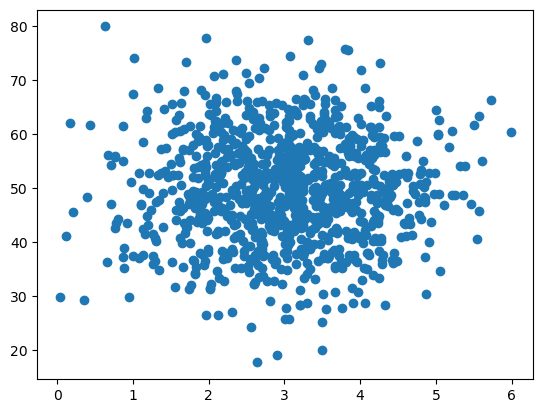

In [9]:
%matplotlib inline

import numpy as np
from pylab import *

def de_mean(x):
    xmean = mean(x)
    return [xi - xmean for xi in x]

def covariance(x, y):
    n = len(x)
    return dot(de_mean(x), de_mean(y)) / (n-1)

pageSpeeds = np.random.normal(3.0, 1.0, 1000)
purchaseAmount = np.random.normal(50.0, 10.0, 1000)

scatter(pageSpeeds, purchaseAmount)

print('El valor de la covarianza es de..',covariance (pageSpeeds, purchaseAmount))


Ahora haremos que nuestros montos de compra fabricados sean una función real de la velocidad de la página, haciendo una correlación muy real. El valor negativo indica una relación inversa; Las páginas que se procesan en menos tiempo resultan en más dinero gastado:

El valor de la covarianza es de.. -14.060833947374462


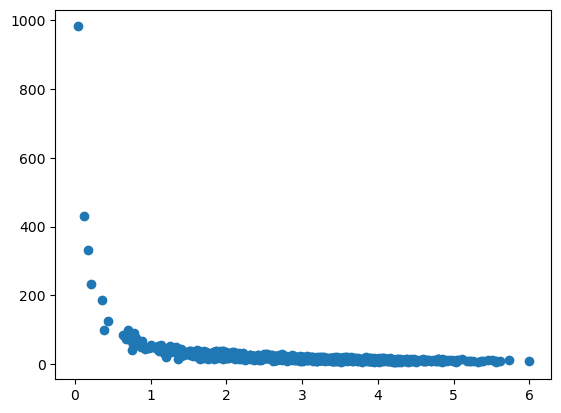

In [10]:
purchaseAmount = np.random.normal(50.0, 10.0, 1000) / pageSpeeds

scatter(pageSpeeds, purchaseAmount)

#covariance (pageSpeeds, purchaseAmount)
print('El valor de la covarianza es de..',covariance (pageSpeeds, purchaseAmount))

Pero, ¿qué significa este valor? La covarianza es sensible a las unidades utilizadas en las variables, lo que dificulta su interpretación. La correlación normaliza todo por sus desviaciones estándar, dándole un valor más fácil de entender que va desde -1 (para una correlación inversa perfecta) a 1 (para una correlación positiva perfecta):

In [11]:
def correlation(x, y):
    stddevx = x.std()
    stddevy = y.std()
    return covariance(x,y) / stddevx / stddevy  #En la vida real, comprobarías si hay que dividir por cero aquí

print('El valor de la correlacion es de..',correlation (pageSpeeds, purchaseAmount))

El valor de la correlacion es de.. -0.3773080414205121


Numpy puede hacer todo esto por usted con numpy.corrcoef. Devuelve una matriz de los coeficientes de correlación entre cada combinación de las matrices pasadas en:

In [12]:
np.corrcoef(pageSpeeds, purchaseAmount)

array([[ 1.        , -0.37693073],
       [-0.37693073,  1.        ]])

(No coincide exactamente solo debido a la precisión matemática disponible en una computadora).

Podemos forzar una correlación perfecta fabricando una relación totalmente lineal (de nuevo, no es exactamente -1 solo debido a errores de precisión, pero está lo suficientemente cerca como para decirnos que hay una correlación realmente buena aquí):

El valor de la correlacion es de.. -1.0010010010010006


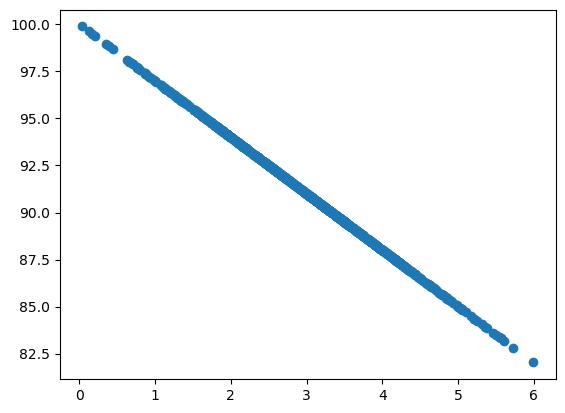

In [14]:
purchaseAmount = 100 - pageSpeeds * 3

scatter(pageSpeeds, purchaseAmount)

#correlation (pageSpeeds, purchaseAmount)

print('El valor de la correlacion es de..',correlation (pageSpeeds, purchaseAmount))

Recuerde, ¡la correlación no implica causalidad!